## LDA (Linear Discriminant Analysis)

The linear combination contained in b X, was suggested by Fisher, so such that the ratio of the differences in the means of the combination linear to their variance is minimum. That is, the linear combination is of the form $Y = bX$, where b must be:

$b=\Sigma^{-1}( \mu_1 - \mu_2 )$

-Assumes normality in the data

-In discriminant analysis, the independent variables are assumed to be normally distributed and the response variable is assumes fixed, which takes the values ​​zero or one, depending on the location of the object in one of the two groups.

-The discriminant analysis aim is to find a linear combination of independent variables that minimizes the probability of incorrectly classifying objects in their respective groups.

-Discriminant analysis seeks a procedure to assign or classify cases to groups.

In [9]:
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


In [4]:
df=data("bioChemists")
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


In [5]:
dummy=pd.get_dummies(df["fem"])
df=pd.concat([df,dummy],axis=1)
dummy=pd.get_dummies(df["mar"])
df=pd.concat([df,dummy],axis=1)
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,1,0,1,0
2,0,Women,Single,0,2.05,6,0,1,0,1
3,0,Women,Single,0,3.75,6,0,1,0,1
4,0,Men,Married,1,1.18,3,1,0,1,0
5,0,Women,Single,0,3.75,26,0,1,0,1


In [6]:
X=df[["Men","kid5","phd","ment","art"]]
y=df[["Married"]]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [11]:
clf=LDA()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.728125

In [12]:
y_pred=clf.predict(X_test)

In [13]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        89
           1       0.79      0.78      0.78       186

    accuracy                           0.71       275
   macro avg       0.67      0.67      0.67       275
weighted avg       0.71      0.71      0.71       275



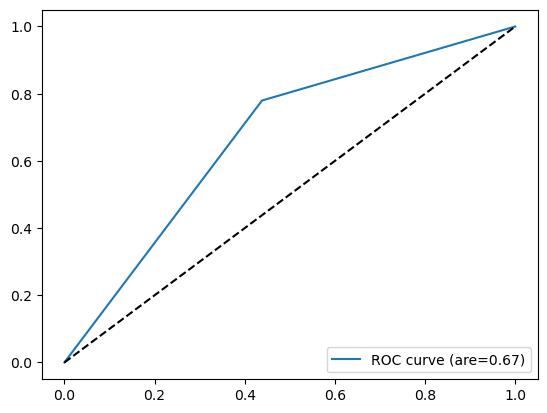

In [16]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1],"k--")
plt.legend(loc="lower right")

# Mahalanobis Distance

The variables used in a study are usually on measurement scales different and are also correlated. So, for example, height and weight of people, are quantities with different units (meters and kilograms), so that the number that represents the distance between two individuals will not only change according to the units of measurement used but also with the degree of association between these variables; in this way, if two variables are closely related and in two objects or individuals take values quite different, these are to be considered further apart than if the same values ​​would have been observed in independent variables.

The Mahalanobis distance between two objects $X_h=(X_{h1},....,X_{hp})$ and $X_i=(X_{i1},....,X_{ip})$ can be defined in the following way:

$D^2_{hi}=(X_h-Xi)'S^{-1}(X_h-Xi)$

with $h,i=1,....n$

The Mahalanobis distance is frequently used to measure the distance between a multivariate observation (individual) and the center of the population. Where does the observation come from. If $\textbf{x}_i=(x_{i1},....,x_{ip})'$ represents a particular individual selected aleatory of a population with center $\bf{\mu}= ( \mu_1 ,....,\mu_p)'$ and the matrix of covariances $\Sigma$, then:

$D_i^2=(\textbf{x}_i-\mu)'\Sigma^{-1}(\textbf{x}_i-\mu)$

A useful way to detect outliers is through the distance between each observation and the center of the data, this is calculated with the distance of mahalanobis

$D_i^2=(\textbf{x}_i- \bar{x}_i)'\Sigma^{-1}(\textbf{x}_i-\bar{x}_i)$ 


Large values ​​of $D_i^2$ warn of the possibility of the observation being an outlier.

Another useful procedure in the identification of an outlier, which serves also to judge multinormality of the data, it is based on the statistic of Wilks


$\omega=1-\frac{nD_{(n)}^2}{(n-1)^2}$

where $D_{(n)}^2=(\textbf{x}_i- \bar{x}_i)'S^{-1}(\textbf{x}_i-\bar{x}_i)$ 